In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 67.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 M

In [2]:
pip install --upgrade jupyter notebook


  Using cached notebook-7.1.3-py3-none-any.whl.metadata (10 kB)
Using cached notebook-7.1.3-py3-none-any.whl (5.0 MB)
  Attempting uninstall: notebook
    Found existing installation: notebook 7.1.2
    Uninstalling notebook-7.1.2:
      Successfully uninstalled notebook-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autovizwidget 0.21.0 requires pandas<2.0.0,>=0.20.1, but you have pandas 2.1.4 which is incompatible.
hdijupyterutils 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.1.4 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.1.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /home/sagemaker-user/.kaggle


In [4]:
!touch /home/sagemaker-user/.kaggle/kaggle.json
!chmod 600 /home/sagemaker-user/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "dinamostafaosman"
kaggle_key = "23d3ec84db59c92f0d9b1388d812c737"

# Save API token the kaggle.json file
with open("/home/sagemaker-user/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [6]:
! pip install kaggle


  Using cached kaggle-1.6.12-py3-none-any.whl


In [7]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 38.2MB/s]


In [8]:
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip


Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor


In [80]:
# Create the train dataset in pandas by reading the csv
train = pd.read_csv('train.csv')
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [81]:
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
# Parse the datetime column in train
train['datetime'] = pd.to_datetime(train['datetime'])

# Extract year
train['year'] = train['datetime'].dt.year
# Extract month
train['month'] = train['datetime'].dt.month
# Extract day
train['day'] = train['datetime'].dt.day



In [82]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [83]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608


In [84]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [85]:
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
# Parse the datetime column in test
test['datetime'] = pd.to_datetime(test['datetime'])

# Extract year
test['year'] = test['datetime'].dt.year
# Extract month
test['month'] = test['datetime'].dt.month
# Extract day
test['day'] = test['datetime'].dt.day


In [86]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20


In [87]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [88]:
save_path = 'agModel-predictClass'
label_column = 'count'
ignored_columns = ['casual', 'registered' ]
# Use the TabularPredictor preset
predictor = TabularPredictor(label=label_column, path=save_path, problem_type="regression", eval_metric='root_mean_squared_error', learner_kwargs={"ignored_columns": ["casual", "registered"]})
#train_data = train.drop(ignored_columns, axis=1)

#Train the model using fit() method
predictor.fit(train_data=train,time_limit=600,presets='best_quality')

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "agModel-predictClass"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   1.42 GB / 5.36 GB (26.4%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data ...


In [94]:
summary = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -52.413951       2.590430  63.585886                0.000736           0.138533            3       True          8
1  RandomForestMSE_BAG_L2  -52.966899       1.992510  53.447650                0.608419          30.091542            2       True          6
2    ExtraTreesMSE_BAG_L2  -53.177647       1.981275  33.355810                0.597184           9.999702            2       True          7
3   KNeighborsDist_BAG_L1  -84.125061       0.056183   0.040721                0.056183           0.040721            1       True          2
4     WeightedEnsemble_L2  -84.125061       0.057315   0.374259                0.001132           0.333538            2       True          5
5   KNeighborsUnif_BAG_L1 -101.546199       0.059056   0.042413                0.05905

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


### Create predictions from test dataset

In [95]:
predictions = predictor.predict(test)
predictions.head()

0    21.162701
1    40.648106
2    44.169907
3    46.504864
4    50.431709
Name: count, dtype: float32

In [96]:
# Describe the `predictions` series to see if there are any negative values
print(predictions.describe())
if (predictions < 0).any():
    print("There are negative values in the predictions.")
else:
    print("There are no negative values in the predictions.")

count    6493.000000
mean      100.365105
std        90.506439
min         2.170540
25%        19.077206
50%        62.676212
75%       168.404587
max       361.182129
Name: count, dtype: float64
There are no negative values in the predictions.


In [92]:
# How many negative values do we have?
val_negative = predictions[predictions < 0]
cnt_negative = len(val_negative)
print('count of negative values = ', cnt_negative)

count of negative values =  0


### Set predictions to submission dataframe, save, and submit

In [74]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [75]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 683kB/s]
Successfully submitted to Bike Sharing Demand

In [76]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                              status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission.csv               2024-05-14 19:56:40  first raw submission                     complete  1.83416      1.83416       
submission_new_hpo.csv       2024-05-14 19:52:52  new features with hyperparameters        complete  0.65798      0.65798       
submission_new_features.csv  2024-05-14 19:44:39  new features                             complete  0.56895      0.56895       
submission.csv               2024-05-14 19:28:40  first raw submission                     complete  1.83416      1.83416       


#### Initial score of `1.83416`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

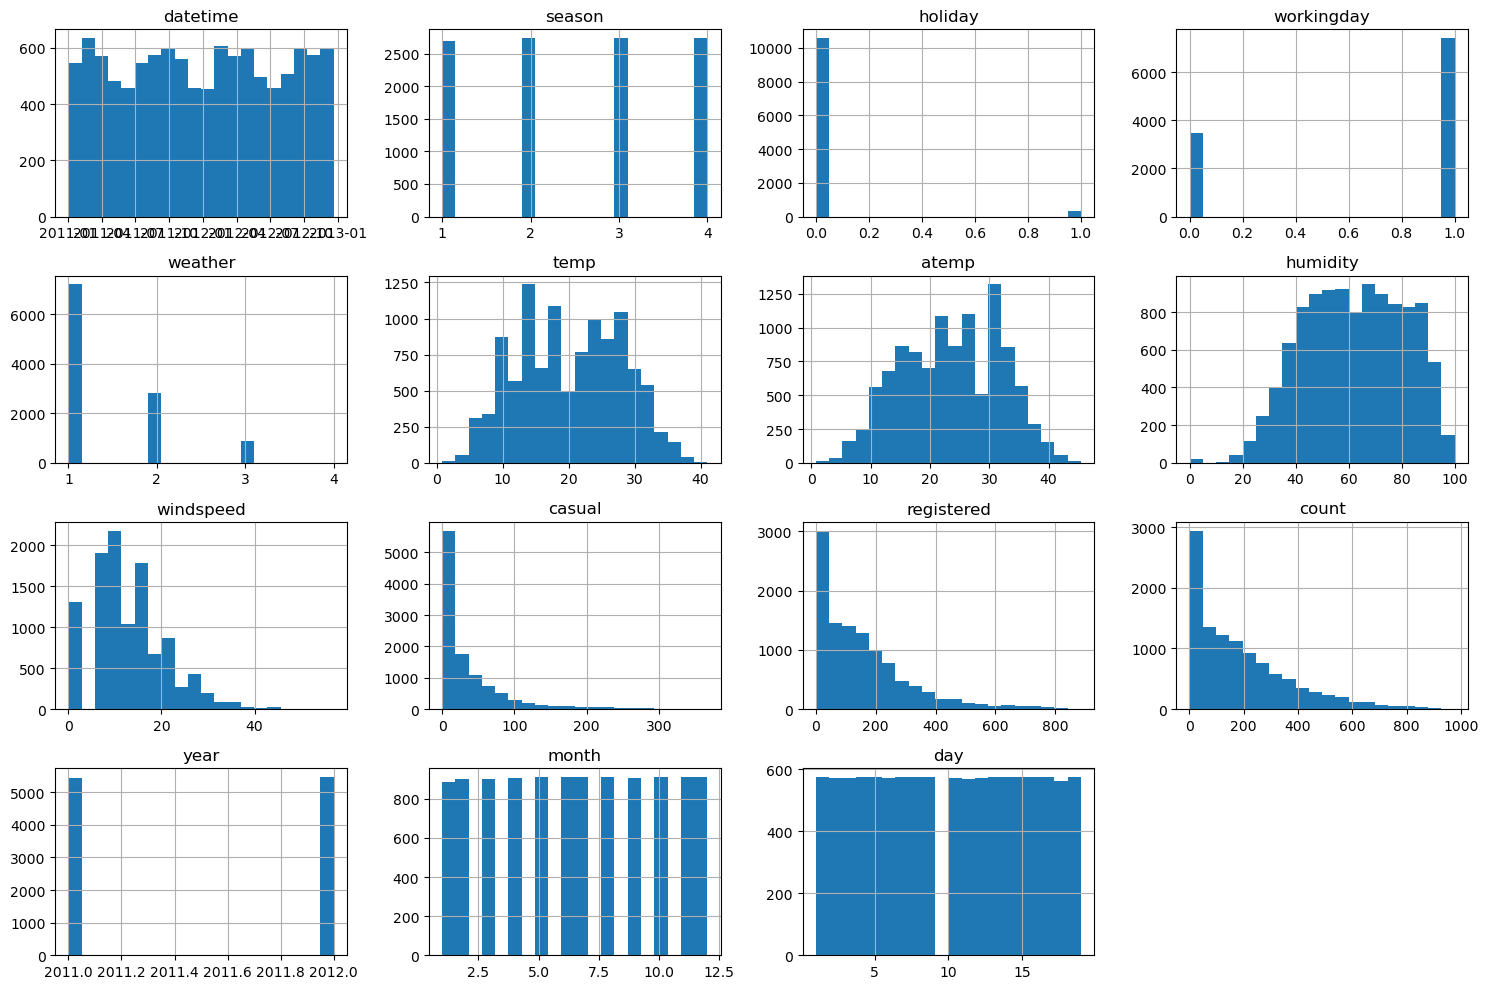

In [27]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [28]:
# create a new feature on train
# Extract hour
train['hour'] = train['datetime'].dt.hour
# Extract minute
train['minute'] = train['datetime'].dt.minute
# Extract second

train['second'] = train['datetime'].dt.second

In [29]:
# create a new feature on test
# Extract hour
test['hour'] = test['datetime'].dt.hour
# Extract minute
test['minute'] = test['datetime'].dt.minute
# Extract second
test['second'] = test['datetime'].dt.second

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [31]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [32]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


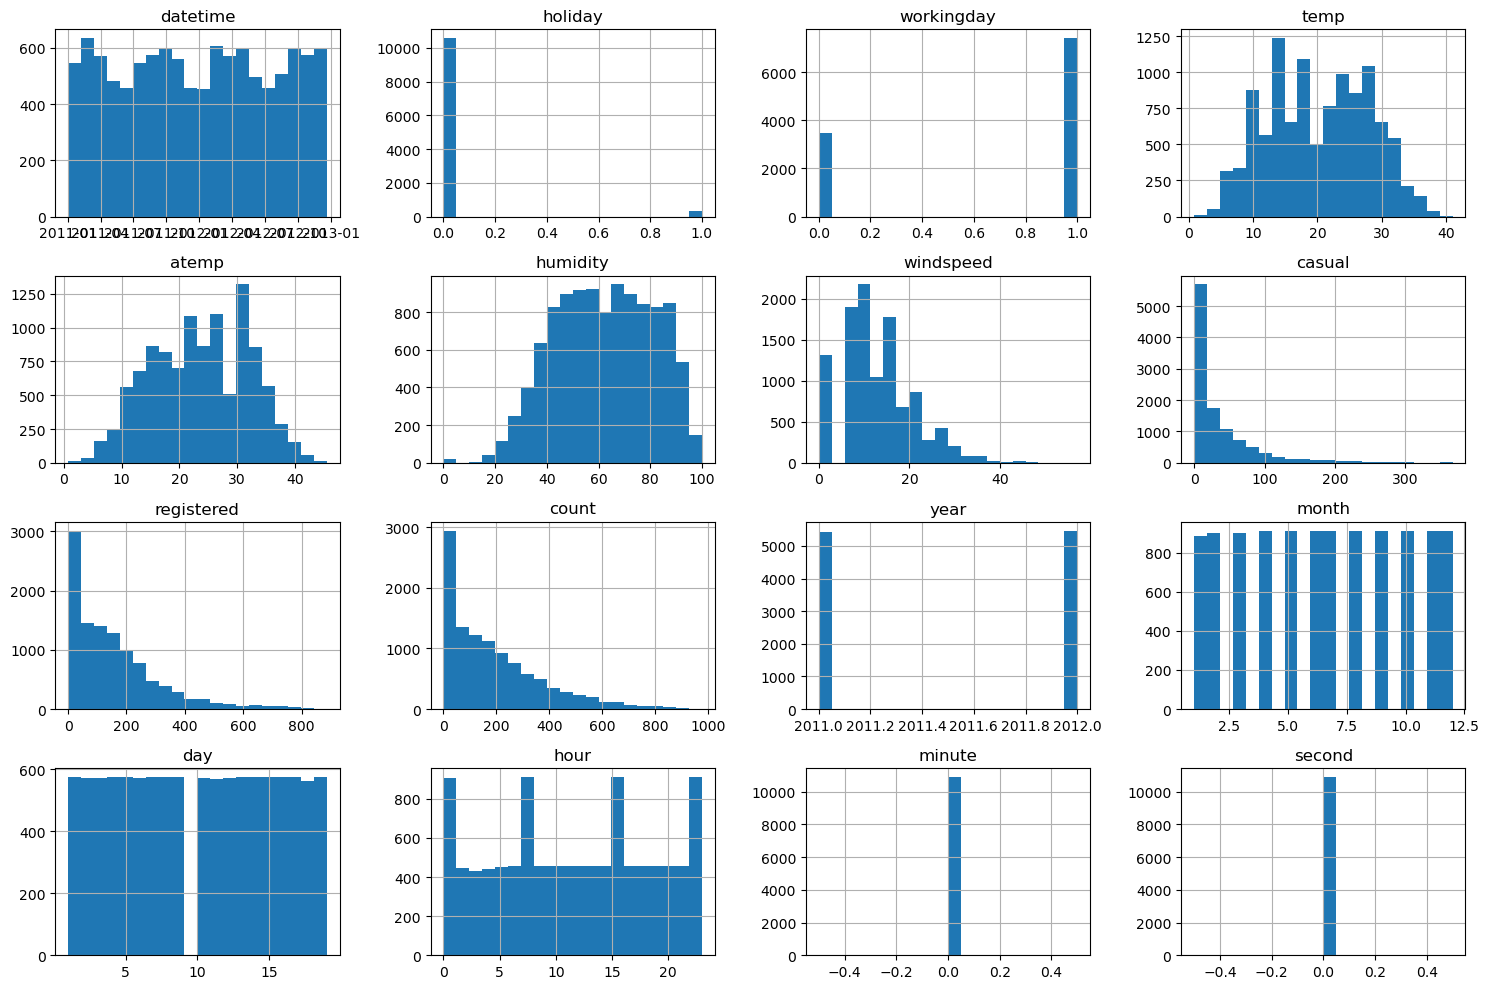

In [33]:
# View histogram of all features again now with the hour feature

train.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [34]:
save_path = 'agModels1-predictClass'
label_column = 'count'
ignored_columns = ['casual', 'registered' ]

# Use the TabularPredictor preset
predictor_new_features = TabularPredictor(label=label_column, path=save_path, problem_type="regression", eval_metric='root_mean_squared_error', learner_kwargs={"ignored_columns": ["casual", "registered"]})


# Train the model using fit() method
predictor_new_features.fit(train_data=train, time_limit=50, presets='best_quality')



Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 50s
AutoGluon will save models to "agModels1-predictClass"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.38 GB / 5.36 GB (63.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 17
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data ...

In [35]:
predictor_new_features_summary = predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForestMSE_BAG_L2  -34.383012       1.848285  53.758672                0.625906          29.828574            2       True          6
1     WeightedEnsemble_L3  -34.383012       1.848880  53.762505                0.000595           0.003833            3       True          7
2     WeightedEnsemble_L2  -36.952393       1.177748  24.115062                0.000581           0.216575            2       True          5
3    ExtraTreesMSE_BAG_L1  -38.107278       0.556449   7.405338                0.556449           7.405338            1       True          4
4  RandomForestMSE_BAG_L1  -38.424984       0.574788  16.462525                0.574788          16.462525            1       True          3
5   KNeighborsDist_BAG_L1  -84.125061       0.045930   0.030625                0.04593

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [36]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    17.123333
1    10.666667
2     4.490000
3     3.330000
4     3.033333
Name: count, dtype: float32

In [37]:
# Describe the `predictions` series to see if there are any negative values
print(predictions_new_features.describe())
if (predictions_new_features < 0).any():
    print("There are negative values in the predictions.")
else:
    print("There are no negative values in the predictions.")

count    6493.000000
mean      168.830490
std       155.352509
min         2.313333
25%        44.536667
50%       137.330002
75%       235.276672
max       917.906677
Name: count, dtype: float64
There are no negative values in the predictions.


In [38]:
# Remember to set all negative values to zero
# How many negative values do we have?
val_negative = predictions_new_features[predictions_new_features < 0]
cnt_negative = len(val_negative)
print('count of negative values = ', cnt_negative)
# Set them to zero
predictions_new_features[predictions_new_features < 0] = 0
# make sure all of them are set to zero
val_negative = predictions_new_features[predictions_new_features < 0]
cnt_negative = len(val_negative)
print('count of negative values = ', cnt_negative)

count of negative values =  0
count of negative values =  0


In [41]:
# Same submitting predictions
submission["count"] = predictions_new_features
submission.to_csv("submission_new_features.csv", index=False)

In [42]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 182k/182k [00:00<00:00, 684kB/s]
Successfully submitted to Bike Sharing Demand

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                              status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-14 19:44:39  new features                             complete  0.56895      0.56895       
submission.csv               2024-05-14 19:28:40  first raw submission                     complete  1.83416      1.83416       
submission.csv               2024-05-11 23:55:05                                           complete  0.77911      0.77911       
submission.csv               2024-05-08 20:56:11                                           complete  1.8159       1.8159        


#### New Score of `.56895`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [97]:
from ray import tune

# Define GBM options
gbm_options = {
    'n_estimators': tune.randint(50, 500),
    'learning_rate': tune.loguniform(0.01, 0.5),
    # Add other GBM options as needed
}

# Define hyperparameters for each model type
hyperparameters = {
    'NN_TORCH': {},
    'GBM': gbm_options,
    'CAT': {'depth': tune.randint(4, 7)},
    'XGB': {},
    'FASTAI': {},
    'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
    'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
    'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}

# Define the number of trials for hyperparameter tuning
num_trials = 10  # Adjust this number based on your resources and requirements

# Define the search strategy for hyperparameter tuning
search_strategy = "random"  # Adjust this strategy as needed, e.g., "grid", "bayesopt", etc.

# Specify hyperparameter tuning settings
hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy,
}


In [109]:

save_path = 'agModels2-predictClass'
label_column = 'count'
# Use the TabularPredictor preset
predictor_new_hpo = TabularPredictor(label=label_column, path=save_path, problem_type="regression", eval_metric='root_mean_squared_error', learner_kwargs={"ignored_columns": ["casual", "registered"]})


# Train the model using fit() method
predictor_new_hpo.fit(train_data=train, time_limit=2000, presets='best_quality',
                       hyperparameters=hyperparameters,
                       hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,)


Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 2000s
AutoGluon will save models to "agModels2-predictClass"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   0.12 GB / 5.36 GB (2.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data ..

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

In [110]:

predictor_loaderboard = TabularPredictor.load('agModels2-predictClass')
leader_board = predictor_loaderboard.leaderboard(extra_info=True)
leader_board

                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order  num_features  num_models  num_models_w_ancestors  memory_size  memory_size_w_ancestors  memory_size_min  memory_size_min_w_ancestors  num_ancestors  num_descendants             model_type             child_model_type                                    hyperparameters hyperparameters_fit                                        ag_args_fit                                           features compile_time                              child_hyperparameters child_hyperparameters_fit                                  child_ag_args_fit                                          ancestors                                        descendants
0     WeightedEnsemble_L3  -52.413951       0.001855  63.645875                0.000726           0.300026            3       True          8             2           1                       7         2868               11524

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-52.413951,0.001855,63.645875,0.000726,0.300026,3,True,8,2,...,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[ExtraTreesMSE_BAG_L2, RandomForestMSE_BAG_L2]",None,{'ensemble_size': 100},{'ensemble_size': 37},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L2, ExtraTreesMSE_BAG_L1,...",[]
1,RandomForestMSE_BAG_L2,-52.966899,0.000930,52.716147,0.000338,28.396649,2,True,6,18,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime, season, atemp, holiday, month, Extr...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[KNeighborsDist_BAG_L1, ExtraTreesMSE_BAG_L1, ...",[WeightedEnsemble_L3]
2,ExtraTreesMSE_BAG_L2,-53.177647,0.000792,34.949199,0.000199,10.629701,2,True,7,18,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime, season, atemp, holiday, month, Extr...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[KNeighborsDist_BAG_L1, ExtraTreesMSE_BAG_L1, ...",[WeightedEnsemble_L3]
3,KNeighborsDist_BAG_L1,-84.125061,0.000099,0.099973,0.000099,0.099973,1,True,2,11,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime, season, atemp, month, datetime.year...",None,{'weights': 'distance'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[ExtraTreesMSE_BAG_L2, WeightedEnsemble_L3, We..."
4,WeightedEnsemble_L2,-84.125061,0.001124,0.351774,0.001025,0.251801,2,True,5,1,...,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],None,{'ensemble_size': 100},{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],[]
5,KNeighborsUnif_BAG_L1,-101.546199,0.000092,0.104892,0.000092,0.104892,1,True,1,11,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime, season, atemp, month, datetime.year...",None,{'weights': 'uniform'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[ExtraTreesMSE_BAG_L2, WeightedEnsemble_L3, Ra..."
6,RandomForestMSE_BAG_L1,-116.598809,0.000228,16.337233,0.000228,16.337233,1,True,3,14,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime, season, atemp, holiday, month, year...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[ExtraTreesMSE_BAG_L2, WeightedEnsemble_L3, Ra..."
7,ExtraTreesMSE_BAG_L1,-124.594468,0.000174,7.777401,0.000174,7.777401,1,True,4,14,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime, season, atemp, holiday, month, year...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[ExtraTreesMSE_BAG_L2, WeightedEnsemble_L3, Ra..."


In [111]:
leader_board.iloc[1]['child_hyperparameters']

{'n_estimators': 300,
 'max_leaf_nodes': 15000,
 'n_jobs': -1,
 'random_state': 0,
 'bootstrap': True,
 'criterion': 'squared_error'}

In [112]:
leader_board.iloc[3]['child_hyperparameters']

{'weights': 'distance'}

In [113]:
leader_board.iloc[6]['child_hyperparameters']

{'n_estimators': 300,
 'max_leaf_nodes': 15000,
 'n_jobs': -1,
 'random_state': 0,
 'bootstrap': True,
 'criterion': 'squared_error'}

In [114]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -52.413951       0.001855  63.645875                0.000726           0.300026            3       True          8
1  RandomForestMSE_BAG_L2  -52.966899       0.000930  52.716147                0.000338          28.396649            2       True          6
2    ExtraTreesMSE_BAG_L2  -53.177647       0.000792  34.949199                0.000199          10.629701            2       True          7
3   KNeighborsDist_BAG_L1  -84.125061       0.000099   0.099973                0.000099           0.099973            1       True          2
4     WeightedEnsemble_L2  -84.125061       0.001124   0.351774                0.001025           0.251801            2       True          5
5   KNeighborsUnif_BAG_L1 -101.546199       0.000092   0.104892                0.00009

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'RandomForestMSE_BAG_L1': -116.59880935969348,
  'ExtraTreesMSE_BAG_L1': -124.59446778429339,
  'WeightedEnsemble_L2': -84.12506123181602,
  'RandomForestMSE_BAG_L2': -52.96689947086908,
  'ExtraTreesMSE_BAG_L2': -53.17764737259783,
  'WeightedEnsemble_L3': -52.41395148054992},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],


In [115]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    21.162701
1    40.648106
2    44.169907
3    46.504864
4    50.431709
Name: count, dtype: float32

In [117]:
# Describe the `predictions` series to see if there are any negative values
print(predictions_new_hpo.describe())
if (predictions_new_hpo < 0).any():
    print("There are negative values in the predictions.")
else:
    print("There are no negative values in the predictions.")



count    6493.000000
mean      100.365105
std        90.506439
min         2.170540
25%        19.077206
50%        62.676212
75%       168.404587
max       361.182129
Name: count, dtype: float64
There are no negative values in the predictions.


In [120]:
# How many negative values do we have?
val_negative = predictions_new_hpo[predictions_new_hpo < 0]
cnt_negative = len(val_negative)
print('count of negative values = ', cnt_negative)
# Set them to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0
# make sure all of them are set to zero
val_negative = predictions_new_hpo[predictions_new_hpo < 0]
cnt_negative = len(val_negative)
print('count of negative values = ', cnt_negative)

count of negative values =  0
count of negative values =  0


In [121]:
# Same submitting predictions
submission["count"] = predictions_new_hpo
submission.to_csv("submission_new_hpo.csv", index=False)

In [122]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 622kB/s]
Successfully submitted to Bike Sharing Demand

In [123]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                              status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-14 20:11:10  new features with hyperparameters        complete  1.83416      1.83416       
submission.csv               2024-05-14 19:56:40  first raw submission                     complete  1.83416      1.83416       
submission_new_hpo.csv       2024-05-14 19:52:52  new features with hyperparameters        complete  0.65798      0.65798       
submission_new_features.csv  2024-05-14 19:44:39  new features                             complete  0.56895      0.56895       


#### New Score of `.65798`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

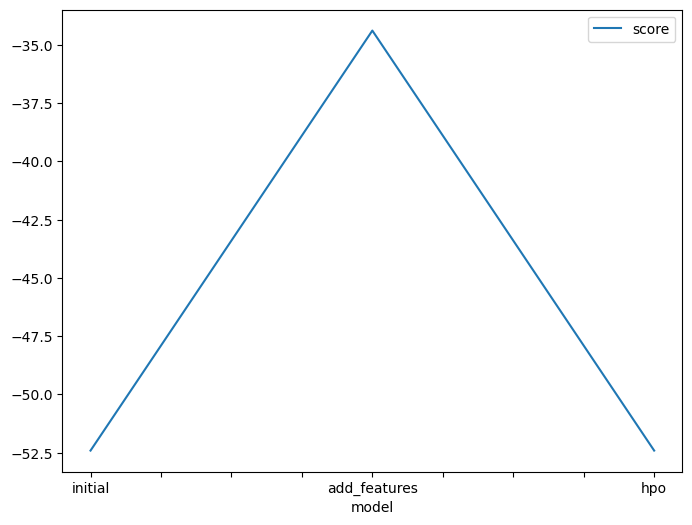

In [125]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [
            predictor.leaderboard(silent=True)['score_val'][0],
            predictor_new_features.leaderboard(silent=True)['score_val'][0],
            leader_board['score_val'][0]
        ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

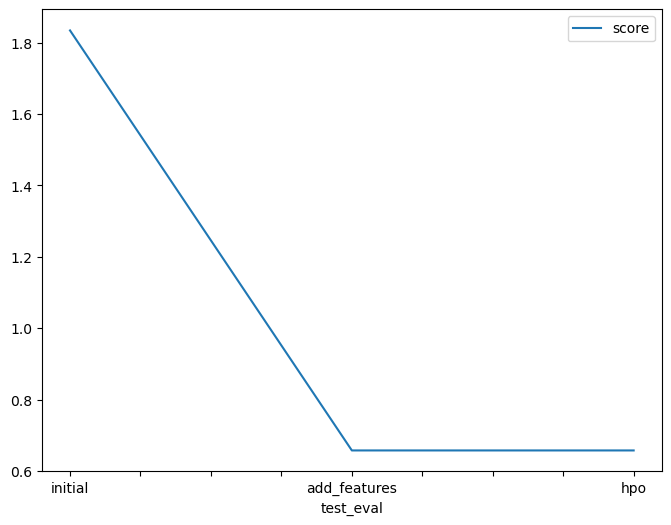

In [126]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.83416 , .65798, .65798]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

In [127]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "RandomForestMSE_BAG_L2": ['default', 'default', {'n_estimators': 300,
                                                 'max_leaf_nodes': 15000,
                                                 'n_jobs': -1,
                                                 'random_state': 0,
                                                 'bootstrap': True,
                                                 'criterion': 'squared_error'}],
    "KNeighborsDist_BAG_L1": ['default', 'default',{'weights': 'distance'}],
    "RandomForestMSE_BAG_L1": ['default', 'default', {'n_estimators': 300,
                                                     'max_leaf_nodes': 15000,
                                                     'n_jobs': -1,
                                                     'random_state': 0,
                                                     'bootstrap': True,
                                                     'criterion': 'squared_error'}],
    "score": [1.84672, .59398, .77911]
})

,model,RandomForestMSE_BAG_L2,KNeighborsDist_BAG_L1,RandomForestMSE_BAG_L1,score
0,initial,default,default,default,1.84672
1,add_features,default,default,default,0.59398
2,hpo,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'weights': 'distance'},"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",0.77911
